#### Integrin

## setup

In [1]:
import os
import sys
import math
import time
import pickle
import copy
#import mdtraj
import MDAnalysis as mda
#import pyemma
#import pyemma.util.contexts
import networkx as nx
import random
#import parmed as pmd
#import acpype
import pandas as pd
from MDAnalysis.analysis import distances
from MDAnalysis.analysis import rms


import numpy as np
from scipy.linalg import eigh
from scipy.spatial.distance import pdist
from scipy.interpolate import interp1d
import matplotlib as mpl
from matplotlib import ticker
if os.environ.get('DISPLAY','') == '':
    print('no display found. Using non-interactive Agg backend')
    mpl.use('Agg')
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


import nglview as nv

no display found. Using non-interactive Agg backend


In [2]:

from importlib import reload 
import sys

# !ulimit -n 100000 # unlimited
# !webuser hard nofile 64000
!ulimit -a

core file size          (blocks, -c) 0
data seg size           (kbytes, -d) unlimited
scheduling priority             (-e) 0
file size               (blocks, -f) unlimited
pending signals                 (-i) 511942
max locked memory       (kbytes, -l) unlimited
max memory size         (kbytes, -m) unlimited
open files                      (-n) 4096
pipe size            (512 bytes, -p) 8
POSIX message queues     (bytes, -q) 819200
real-time priority              (-r) 0
stack size              (kbytes, -s) 8192
cpu time               (seconds, -t) unlimited
max user processes              (-u) 4096
virtual memory          (kbytes, -v) unlimited
file locks                      (-x) unlimited


#### plot settings

In [4]:
showPlots=1
useMagics=1
if useMagics:
    %matplotlib inline
    #%matplotlib notebook
    %load_ext autoreload
    %autoreload 2
    %reload_ext autoreload
    
font = {'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [5]:
path_to_structures = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/'

!ls path_to_structures/PDB

ls: cannot access path_to_structures/PDB: No such file or directory


## load structures

In [6]:


path_to_structures = '/project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/'

# cryst_structs = ['2vc2', '2vdk', '2vdl', '2vdm', '2vdn', '2vdo', '2vdp', '2vdq', '2vdr',
#                  '3fcs', '3fcs_2', '3fcu', '3fcu_2', '3fcu_3', '3nid', '3nid_2', '3nif', 
#                  '3nif_2', '3nig', '3nig_2', '3t3m', '3t3m_2', '3t3p', '3t3p_2', 
#                  '3zdx', '3zdx_2', '3zdy', '3zdy_2', '3zdz', '3zdz_2', '3ze0', '3ze0_2', 
#                  '3ze1', '3ze1_2', '3ze2', '3ze2_2',
#                  '4z7n', '4z7n_2', '4z7o', '4z7o_2', '4z7q', '4z7q_2',
#                  '5hdb', '5hdb_2', 
#                  '7tct', '7tct_2', '7tho', '7tho_2', '7tpd', '7tpd_2', '7u9f', '7u9f_2', 
#                  '7ubr', '7ubr_2', '7udg', '7udg_2', '7ue0', '7ue0_2', '7uh8', '7uh8_2',
#                  '7ujk', '7ujk_2', '7uko', '7uko_2', '7ukt', '7ukt_2',
#                  '7td8', '7td8_2', '7tmz', '7tmz_2', '7u60', '7u60_2', '7u9v', '7u9v_2', 
#                  '7ucy', '7ucy_2', '7udh', '7udh_2', '7ufh', '7ufh_2', '7uje', '7uje_2',
#                  '7uk9', '7uk9_2', '7ukp', '7ukp_2',
#                  ]

# cryo_structs = ['4cak', '6v4p', '7la4', '8gcd', '8gce', '8t2u', '8t2v']

# nmr_structs_cryo_likenames = ['7l8p', '7l8p_2']

# nmr_structs = ['1dpk', '1dpq', '1kup', '1kuz', '1s4w', '1m8o',
#                '2k1a', '2k9j', '2knc', '2mtp', '2n9y', 
#                '3m10', '7kn0', '7sft']


cryst_structs=['1tye','1tye_2','1tye_3', '2vc2','2vdk','2vdl','2vdm','2vdn','2vdo','2vdp','2vdq','2vdr',
               '3fcs','3fcs_2','3fcu','3fcu_2','3fcu_3',
               '3nid','3nid_2','3nif','3nif_2','3nig','3nig_2',
               '3t3m','3t3m_2','3t3p','3t3p_2',
               '3zdx','3zdx_2','3zdy','3zdy_2','3zdz','3ze0',
               '3ze1','3ze2','3zdz_2','3ze0_2','3ze1_2','3ze2_2',
               '4z7n','4z7n_2','4z7o','4z7o_2','4z7q','4z7q_2',
               '5hdb','5hdb_2',
               '7tct','7tct_2','7td8','7td8_2','7tho','7tho_2',
               '7tmz','7tmz_2','7tpd','7tpd_2','7u60','7u60_2','7u9f',
               '7u9f_2','7u9v','7u9v_2','7ubr','7ubr_2','7ucy','7ucy_2',
               '7udg','7udg_2','7udh','7udh_2','7ue0','7ue0_2','7ufh',
               '7ufh_2','7uh8','7uh8_2','7uje','7uje_2','7ujk','7ujk_2',
               '7uk9','7uk9_2','7uko','7uko_2','7ukp','7ukp_2','7ukt','7ukt_2']


#'4cak', 
cryo_structs = ['4cak','8gcd', '8gcd_2', '8gce', 
                '8t2u','8t2v', '6v4p', '7la4']

nmr_structs_cryo_likenames=['7l8p','7l8p_2']
          
#'3m10', 
nmr_structs=['1dpk', '1dpq', '1kup','1kuz', '1s4w', '1m8o', 
             '2k1a', '2k9j', '2knc', '2mtp', '2n9y', '7kn0', '7sft']


len(cryst_structs), len(cryo_structs), len(nmr_structs), len (nmr_structs_cryo_likenames)




(89, 8, 13, 2)

In [7]:

import glob

def extract_frame_number(filename):
    base_name = os.path.basename(filename)
    frame_part = base_name.split("_")[2]#[-1]  
    #print(frame_part)
    frame_number = int(frame_part) #int(frame_part.split(".")[0].replace("model_", ""))
    return frame_part  # frame_number

#sorted_files = sorted(files, key=extract_frame_number)


In [8]:

# exp_universe_image_dict = {}
# string_universe_image_dict = {}
# rmsd_exp_string_image = {}

# for images in range(19):
    

#     # Check if file exists
#     if os.path.exists(path_to_structures+'/PDBstructures_2/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl'):
#         os.remove(path_to_structures+'/PDBstructures_2/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl')
#         #with open(path_to_structures+'/PDBstructures/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl', 'rb') as input_file:     
#         #    rmsd_exp_string_image[images] = pickle.load(input_file)

In [8]:
# !ls /project2/andrewferguson/sivadasetty/doe/analysis-integrin/string_mechanisms/deadbolt/string_parallel_100k_full_lipid_case/final_string/PDBstructures_2/*1kuz*


In [9]:
# rmsd_exp_string_image

In [9]:

exp_universe_image_dict = {}
string_universe_image_dict = {}
rmsd_exp_string_image = {}

for images in range(19):
    

    # Check if file exists
    if os.path.exists(path_to_structures+'/PDBstructures_2/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl'):
        print(f"Image {images} exists")
        with open(path_to_structures+'/PDBstructures_2/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl', 'rb') as input_file:     
            rmsd_exp_string_image[images] = pickle.load(input_file)
    
        
    else:
        print(f"Image {images} does not exist")
        
    
        cryst_universe_image_dict_e = {}
        cryo_universe_image_dict_e = {}
        nmr_withcrystlikenames_universe_image_dict_e = {}
        nmr_universe_image_dict_e = {}

        for c in cryst_structs:

            cryst_struct = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/'+c+'_aligned_CA.pdb'
            cryst_universe_image_dict_e[c] = mda.Universe(cryst_struct)
            
            
        #print(cryst_universe_image_dict_e['7ukt_2'])

        for cr in cryo_structs:
            #print(cr)
            cryo_struct = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/'+cr+'_aligned_CA.pdb'
            cryo_universe_image_dict_e[cr] = mda.Universe(cryo_struct)
            
        #print('cryo')
        #print(cryo_universe_image_dict_e)
            
        for nl in nmr_structs_cryo_likenames:

            nmr_struct_cryo_likenames = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/'+nl+'_aligned_CA.pdb'
            nmr_withcrystlikenames_universe_image_dict_e[nl] = mda.Universe(nmr_struct_cryo_likenames)

        for n in nmr_structs:

            #1kup_model_10_aligned_CA.
            nmr_files = glob.glob(path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/'+n+'_model_*_aligned_CA.pdb')        
            sorted_nmr_files = sorted(nmr_files, key=extract_frame_number)

            nmr_struct = {}
            for m, frame_file in enumerate(sorted_nmr_files):
                nmr_universe_image_dict_e[n + '_m' + str(m)] = mda.Universe(frame_file)

        ##
        exp_universe_image_dict[images] = {**cryst_universe_image_dict_e, 
                                           **cryo_universe_image_dict_e,
                                           **nmr_withcrystlikenames_universe_image_dict_e,
                                           **nmr_universe_image_dict_e}


        ####
        cryst_string_universe_image_dict_e = {}
        cryo_string_universe_image_dict_e = {}
        nmr_string_withcrystlikenames_universe_image_dict_e = {}
        nmr_string_universe_image_dict_e = {}

        for c in cryst_structs:
            string_cryst_struct = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+c+'_CA.pdb'
            string_cryst_universe = mda.Universe(string_cryst_struct) 
            cryst_string_universe_image_dict_e[c] = string_cryst_universe
            
            
        #print(cryst_string_universe_image_dict_e)

        for cr in cryo_structs:
            #print(cr)
            string_cryo_struct = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+cr+'_CA.pdb'
            string_cryo_universe = mda.Universe(string_cryo_struct) 
            cryo_string_universe_image_dict_e[cr] = string_cryo_universe
            
        #print('cryo')
        #print(cryo_string_universe_image_dict_e)
  
        for nl in nmr_structs_cryo_likenames:

            string_nmr_struct_cryo_likenames = path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/'+'target_md_'+str(images)+'_'+nl+'_CA.pdb'
            nmr_string_withcrystlikenames_universe_image_dict_e[nl] = mda.Universe(string_nmr_struct_cryo_likenames)
            
        for n in nmr_structs:

            #1kup_model_10_aligned_CA./target_md_0_1kup_model_10_CA.pdb
            string_nmr_files = glob.glob(path_to_structures+'/PDBstructures_2/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+n+'_model_*_CA.pdb')        
            sorted_nmr_files = sorted(string_nmr_files, key=extract_frame_number)

            #string_nmr_struct = {}
            for m, frame_file in enumerate(sorted_nmr_files):
                nmr_string_universe_image_dict_e[n + '_m' + str(m)] = mda.Universe(frame_file)


        string_universe_image_dict[images] = {**cryst_string_universe_image_dict_e, 
                                              **cryo_string_universe_image_dict_e,
                                              **nmr_string_withcrystlikenames_universe_image_dict_e,
                                              **nmr_string_universe_image_dict_e}


        rmsd_exp_string_image_e = {}
        #for e in exp_structs + state_structs + nmr_structs:
        for e in exp_universe_image_dict[images]:
            
            #print(images)

            exp_atoms = exp_universe_image_dict[images][e].select_atoms("all")
            string_atoms = string_universe_image_dict[images][e].select_atoms("all")

            #print(e, exp_atoms.n_atoms, string_atoms.n_atoms)
            
            rmsd_exp_string_image_e[e] = rms.rmsd(exp_atoms.positions, string_atoms.positions, superposition=True)/10

        rmsd_exp_string_image[images] = rmsd_exp_string_image_e


        # Save the dictionary of dictionaries to a .pkl file
        with open(path_to_structures+'/PDBstructures_2/'+'final_string_iter147_rmsd_results_image'+str(images)+'.pkl', 'wb') as file:
            pickle.dump(rmsd_exp_string_image[images], file)



Image 0 exists
Image 1 exists
Image 2 exists
Image 3 exists
Image 4 exists
Image 5 exists
Image 6 exists
Image 7 exists
Image 8 exists
Image 9 exists
Image 10 exists
Image 11 exists
Image 12 exists
Image 13 exists
Image 14 exists
Image 15 exists
Image 16 exists
Image 17 exists
Image 18 exists


In [10]:
rmsd_exp_string_image

{0: {'1tye': 1.4606724013499508,
  '1tye_2': 1.4475264492971205,
  '1tye_3': 1.4313696168885472,
  '2vc2': 1.7683066042839442,
  '2vdk': 1.7709201019117575,
  '2vdl': 1.7745813410269977,
  '2vdm': 1.7877697854095245,
  '2vdn': 1.765846639716862,
  '2vdo': 1.7805757657058383,
  '2vdp': 1.788548596268414,
  '2vdq': 1.7778848745309876,
  '2vdr': 1.7820085129307461,
  '3fcs': 0.6583834685394889,
  '3fcs_2': 0.629981374573948,
  '3fcu': 1.600669043416941,
  '3fcu_2': 1.5845189515330176,
  '3fcu_3': 1.5526006329907704,
  '3nid': 0.5825470852120898,
  '3nid_2': 0.583654582782678,
  '3nif': 0.5806508735745619,
  '3nif_2': 0.575574719950953,
  '3nig': 0.5842866993388067,
  '3nig_2': 0.5838427492682459,
  '3t3m': 0.5817883304627312,
  '3t3m_2': 0.5838203911608464,
  '3t3p': 0.583284191922413,
  '3t3p_2': 0.5842520482852621,
  '3zdx': 0.5794925895511953,
  '3zdx_2': 0.5771375194606054,
  '3zdy': 0.5806594011836992,
  '3zdy_2': 0.5783946757883915,
  '3zdz': 0.5792650928761105,
  '3ze0': 0.58333676

In [12]:
#exp_universe_image_dict[0]

In [13]:
#exp_universe_image_dict[0]
#string_universe_image_dict[0]#['1dpk']

In [13]:
## calculate RMSD

In [14]:



# for images in range(19):

#     rmsd_exp_string_image_e = {}
#     for e in exp_structs + state_structs + nmr_structs:
        
#         print(e)
    
#         exp_atoms = exp_universe_image_dict[images][e].select_atoms("all")
#         string_atoms = string_universe_image_dict[images][e].select_atoms("all")

#         rmsd_exp_string_image_e[e] = rms.rmsd(exp_atoms.positions, string_atoms.positions, superposition=True)/10

#     rmsd_exp_string_image[images] = rmsd_exp_string_image_e
    
    
# # Print the RMSD result
# #print(f"RMSD between the two structures: {rmsd_value:.3f} Å")

In [16]:
## Save RESULTS

In [17]:
# # Save the dictionary of dictionaries to a .pkl file
# with open(path_to_structures+'/PDBstructures/'+'final_string_iter147_rmsd_results.pkl', 'wb') as file:
#     pickle.dump(rmsd_exp_string_image, file)

In [18]:
## LOAD RMSD RESULTS

In [15]:
# # Load the dictionary of dictionaries from the .pkl file
# with open(path_to_structures+'/PDBstructures/'+'final_string_iter147_rmsd_results.pkl', 'rb') as file:
#     rmsd_exp_string_image = pickle.load(file)

In [16]:
# rmsd_exp_string_image

## plot RMSD of each image with all structs in either cryst/cryo/nmr

In [17]:
# import matplotlib.gridspec as gridspec
# from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator


# # Number of rows and columns for subplots based on the number of inner dictionaries
# # num_dicts = len(rmsd_exp_string_image)
# # rows = 5
# # cols = (num_dicts + 1) // 5  # Adjust for total number of subplots

# # Create figure and gridspec layout
# fig = plt.figure(figsize=(40, 25))


# rows=6
# cols=4
# gs = gridspec.GridSpec(rows, cols, hspace=0.3, wspace=0.25)

# # # Iterate through the dictionary of dictionaries and plot each one
# for i, (key, inner_dict) in enumerate(rmsd_exp_string_image.items()):
#     ax = fig.add_subplot(gs[i])
    
        
#     # Filter the dictionary
#     filtered_inner_dict = {k: v for k, v in inner_dict.items() if k not in nmr_structs}
#     filtered_inner_dict = {k: v for k, v in filtered_inner_dict.items() if k not in state_structs}
#     filtered_inner_dict = {k: v for k, v in filtered_inner_dict.items() if k not in ['4cak']}
    
    

    
# #     # Get keys and values from the inner dictionary
#     keys = list(filtered_inner_dict.keys())
#     values = list(filtered_inner_dict.values())
    
# # #     # Bar plot for the current dictionary
#     ax.bar(keys, values, color='blue', width=0.6, alpha=0.6)
    
#     plt.xticks(rotation=90, fontsize=12)
    
# #     ax1.xaxis.set_major_locator(MultipleLocator(2))
#     ax.yaxis.set_major_locator(MultipleLocator(0.5))
# #     ax1.xaxis.set_minor_locator(AutoMinorLocator(n=10))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
#     ax.tick_params(which='major', length=8)
#     ax.tick_params(which='minor', length=4)
    
# #     # Set titles and labels for each subplot
# #     ax.set_title(f"{key}")
# #     ax.set_xlabel('Keys')
#     ax.set_ylabel('RMSD [nm]')

# # # Show the full grid of subplots
# # plt.show()


## single image structure

In [18]:
# import matplotlib.gridspec as gridspec
# from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator


# # Number of rows and columns for subplots based on the number of inner dictionaries
# # num_dicts = len(rmsd_exp_string_image)
# # rows = 5
# # cols = (num_dicts + 1) // 5  # Adjust for total number of subplots

# # Create figure and gridspec layout
# fig = plt.figure(figsize=(50, 10))


# rows=1
# cols=1
# gs = gridspec.GridSpec(rows, cols, hspace=0.3, wspace=0.25)

# # # Iterate through the dictionary of dictionaries and plot each one
# for i, (key, inner_dict) in enumerate(rmsd_exp_string_image.items()):
    
#     if i > 0:
#         break
#     ax = fig.add_subplot(gs[i])

    
#     # Bar plot for the current dictionary
#     ax.bar(keys, values, color='blue', width=0.6, alpha=0.6)

#     ax.set_xticklabels(keys, rotation=90, fontsize=10)#, ha='right')  # Use spaced labels
    
    
#     #plt.xticks(rotation=90, fontsize=12)
    
# #     ax1.xaxis.set_major_locator(MultipleLocator(2))
#     ax.yaxis.set_major_locator(MultipleLocator(0.5))
# #     ax1.xaxis.set_minor_locator(AutoMinorLocator(n=10))
#     ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
#     ax.tick_params(which='major', length=8)
#     ax.tick_params(which='minor', length=4)
    
# #     # Set titles and labels for each subplot
# #     ax.set_title(f"{key}")
# #     ax.set_xlabel('Keys')
#     ax.set_ylabel('RMSD [nm]')

# # # Show the full grid of subplots
# # plt.show()


## Plot by experimental structures

In [11]:
# Transposing the dictionary of dictionaries
transposed_rmsd_exp_string_image = {}
for outer_key, inner_dict in rmsd_exp_string_image.items():
    for inner_key, value in inner_dict.items():
        # Create the inner dictionary if it doesn't exist
        if inner_key not in transposed_rmsd_exp_string_image:
            transposed_rmsd_exp_string_image[inner_key] = {}
        # Swap the outer and inner keys
        transposed_rmsd_exp_string_image[inner_key][outer_key] = value

In [18]:
# transposed_rmsd_exp_string_image

In [13]:
outer_keys = []
inner_keys = []


for outer_key, inner_dict in transposed_rmsd_exp_string_image.items():
    min_inner_key = min(inner_dict, key=inner_dict.get)
    outer_keys.append(outer_key)
    inner_keys.append(min_inner_key)

# Create a DataFrame for better visualization
df = pd.DataFrame({
    'PDB': outer_keys,
    'String': inner_keys
})

print(df)

min_value_keys = df.set_index('PDB')['String'].to_dict()

          PDB  String
0        1tye      14
1      1tye_2      14
2      1tye_3      14
3        2vc2      17
4        2vdk      17
..        ...     ...
345  7sft_m15       1
346  7sft_m16       7
347  7sft_m17       1
348  7sft_m18       1
349  7sft_m19       1

[350 rows x 2 columns]


In [26]:
# min_value_keys

## crysal

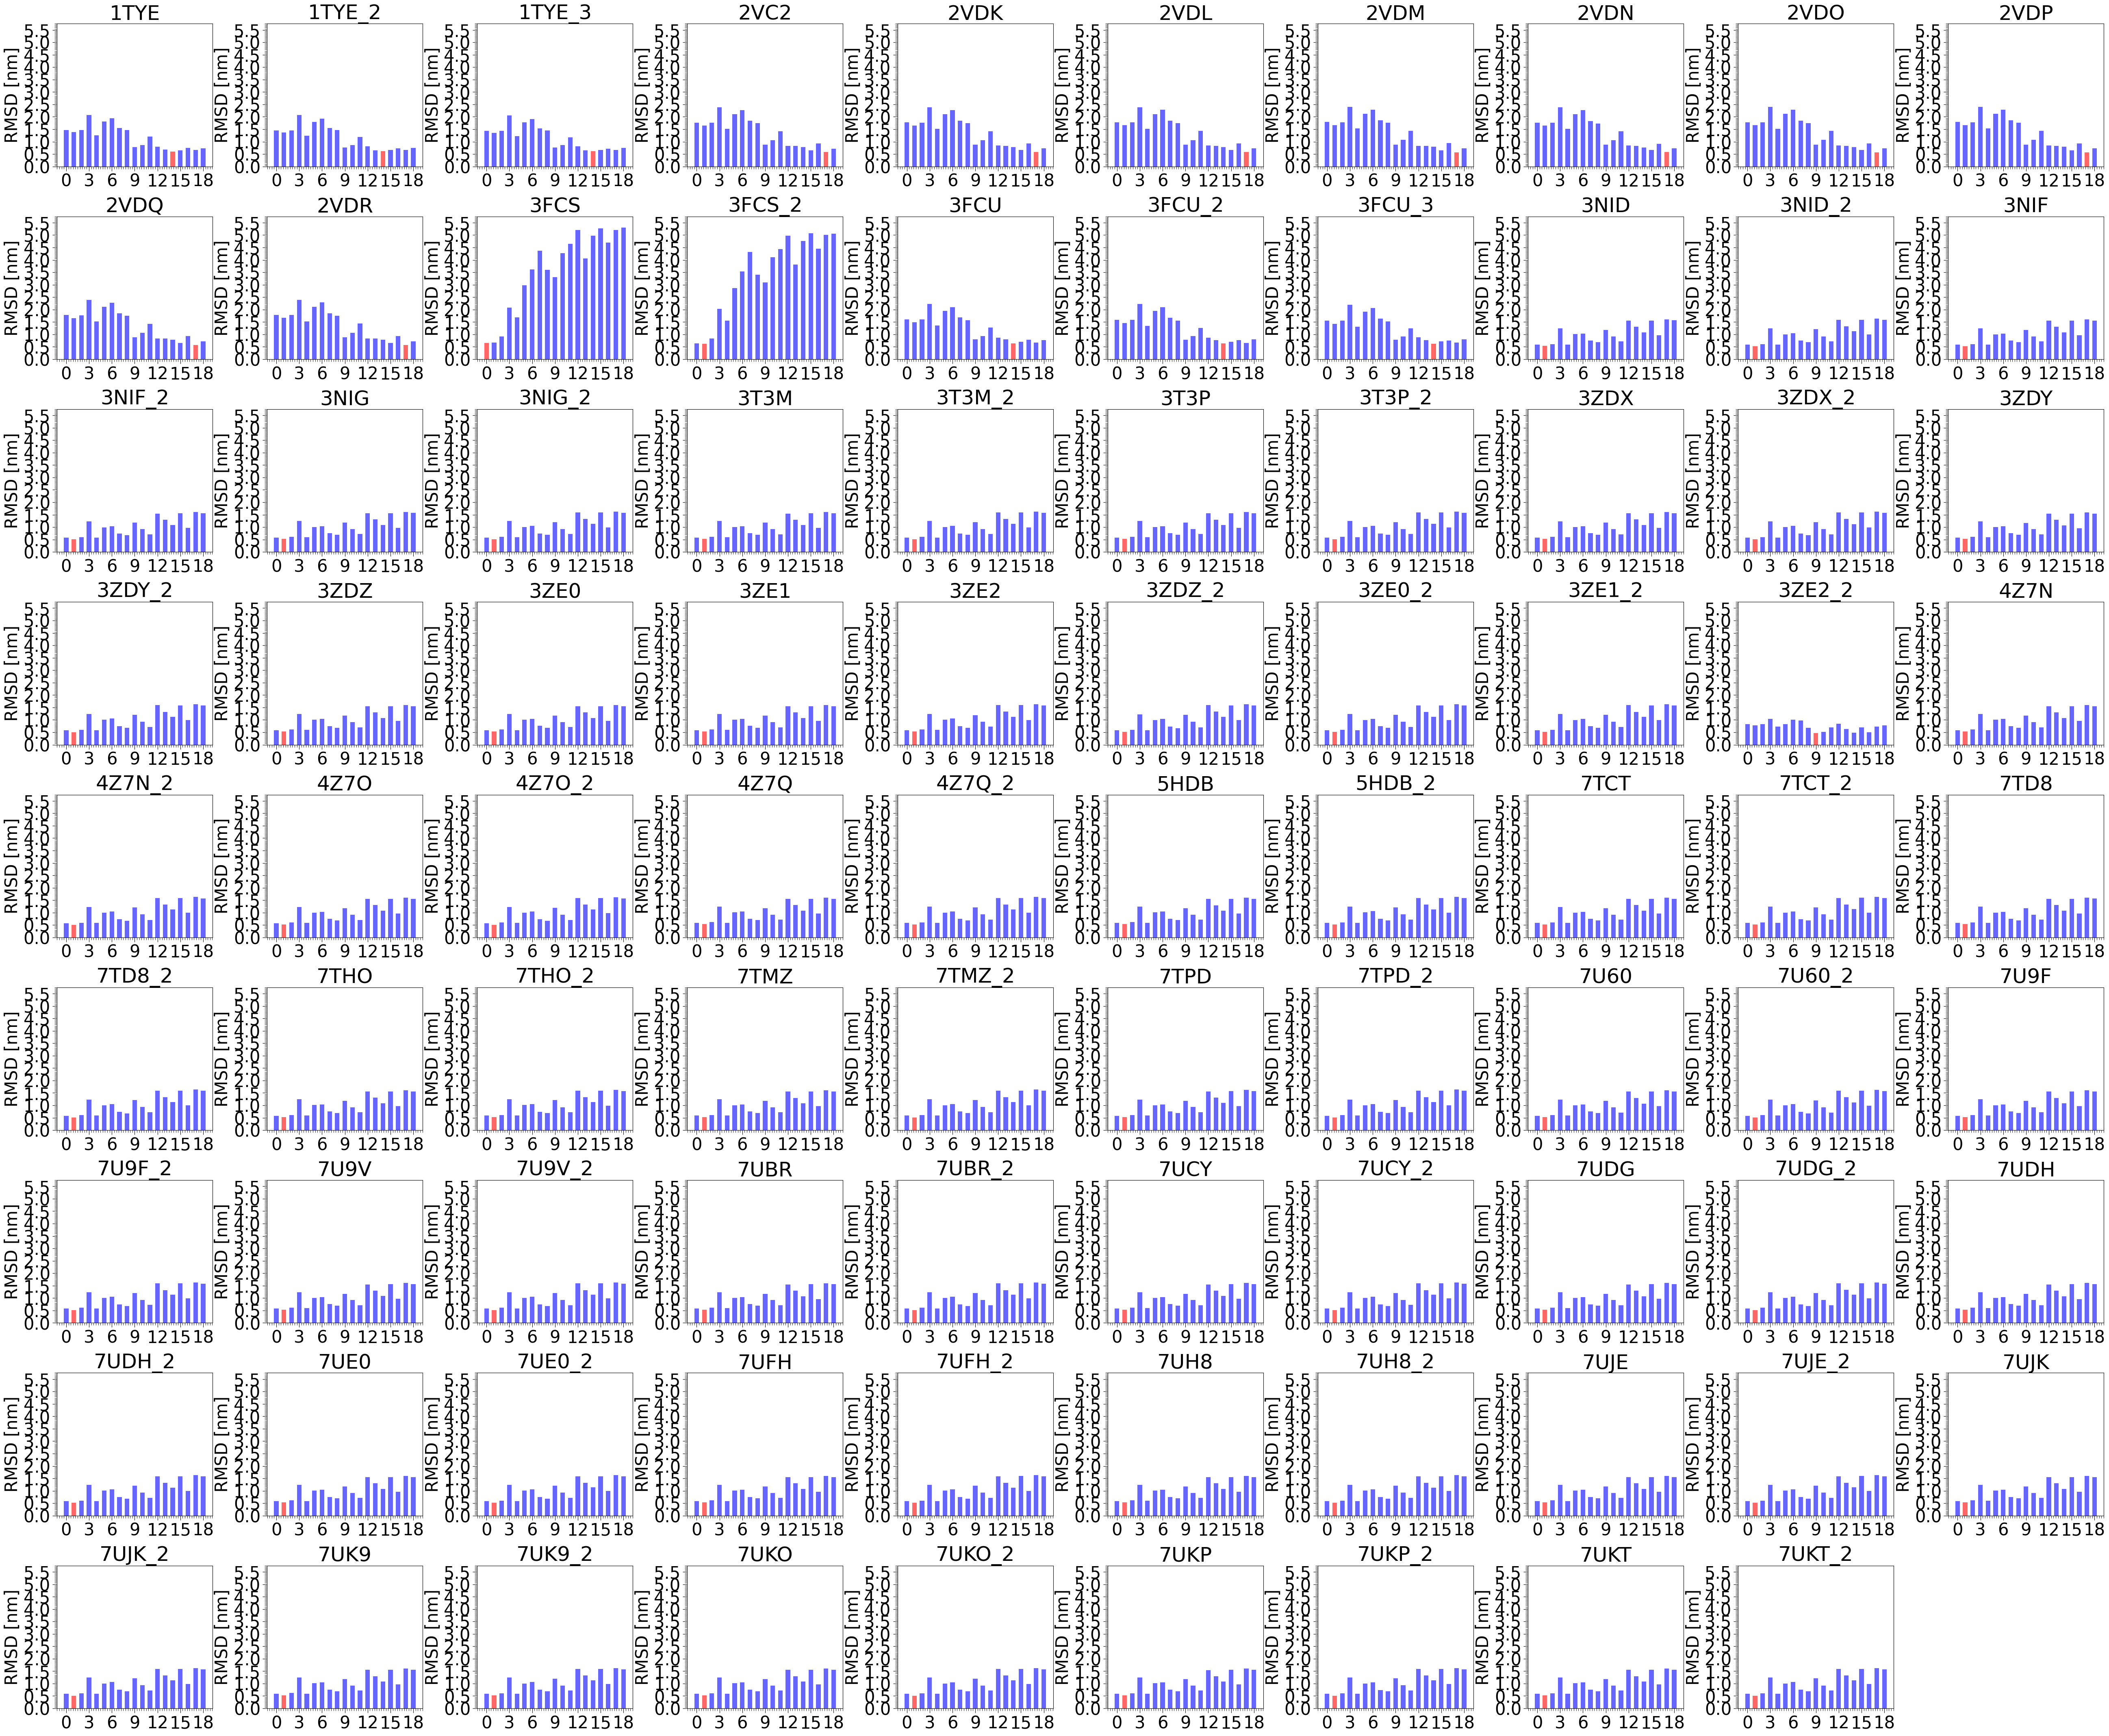

In [22]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

font = {'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

# Number of rows and columns for subplots based on the number of inner dictionaries
# num_dicts = len(rmsd_exp_string_image)
# rows = 5
# cols = (num_dicts + 1) // 5  # Adjust for total number of subplots

# Create figure and gridspec layout
fig = plt.figure(figsize=(65, 60))


rows=10
cols=10

gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)

# # Iterate through the dictionary of dictionaries and plot each one
count_i=0
for i, (key, inner_dict) in enumerate(transposed_rmsd_exp_string_image.items()):

    check_cryo = False
    for cr in cryo_structs:
        if key.startswith(cr):
            check_cryo = True

    if check_cryo:
        continue
        
        
    check_nmr = False
    for n in nmr_structs:
        if key.startswith(n):
            check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if key.startswith(n):
            check_nmr = True
            
    if check_nmr:
        continue
        

    ax = fig.add_subplot(gs[count_i])
    
#     # Get keys and values from the inner dictionary
    keys = list(inner_dict.keys())
    values = list(inner_dict.values())
    
# #     # Bar plot for the current dictionary
    

    #print(key,min_value_keys.get(key))
    colors = ['red' if k == min_value_keys.get(key) else 'blue' for k in keys]
    ax.bar(keys, values, color=colors, width=0.6, alpha=0.6)
    
#     plt.xticks(rotation=90, fontsize=12)
    
    ax.xaxis.set_major_locator(MultipleLocator(3))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)
    
    ax.set_title(key.upper())
    
    ax.set_ylim(0,5.75)
    
#     # Set titles and labels for each subplot
#     ax.set_title(f"{key}")
#     ax.set_xlabel('Keys')
    ax.set_ylabel('RMSD [nm]')
    
    count_i+=1

# # Show the full grid of subplots
# plt.show()


## cryo

In [17]:
## RMSD with 8gcd and 8gce

print(transposed_rmsd_exp_string_image['8gcd'][min_value_keys['8gcd']])
print(transposed_rmsd_exp_string_image['8gcd_2'][min_value_keys['8gcd_2']])
print(transposed_rmsd_exp_string_image['8gce'][min_value_keys['8gce']])

print(transposed_rmsd_exp_string_image['7l8p'][min_value_keys['8gce']])
print(transposed_rmsd_exp_string_image['8gce'][min_value_keys['8gce']])



0.7685569239303514
0.6569552498528233
0.6945989979756131


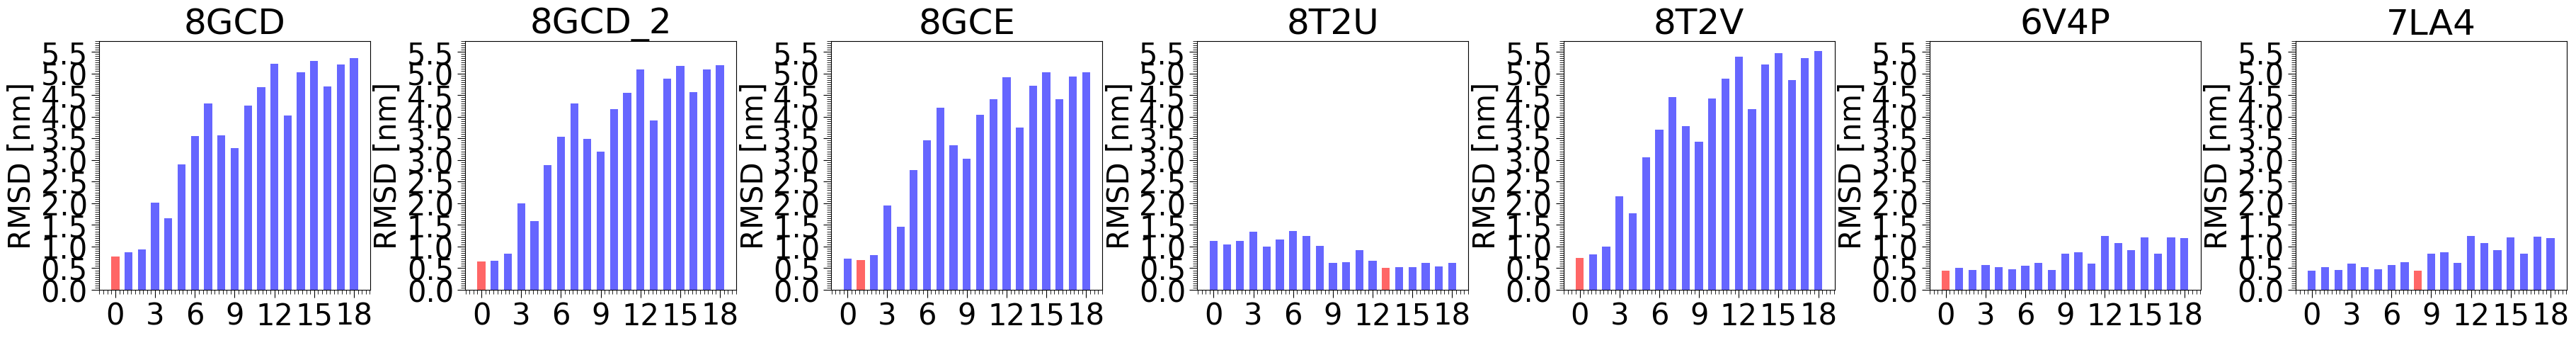

In [24]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

font = {'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

# Number of rows and columns for subplots based on the number of inner dictionaries
# num_dicts = len(rmsd_exp_string_image)
# rows = 5
# cols = (num_dicts + 1) // 5  # Adjust for total number of subplots

# Create figure and gridspec layout
fig = plt.figure(figsize=(65, 60))


rows=10
cols=10

gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)

# # Iterate through the dictionary of dictionaries and plot each one
count_i=0
for i, (key, inner_dict) in enumerate(transposed_rmsd_exp_string_image.items()):

            
    check_cryo = False
    for cr in cryo_structs:
        if key.startswith(cr):
            check_cryo = True
  
    if not check_cryo:
        continue
        
        
    if key.startswith('4cak'):
        continue
        

    ax = fig.add_subplot(gs[count_i])
    
#     # Get keys and values from the inner dictionary
    keys = list(inner_dict.keys())
    values = list(inner_dict.values())
    
# #     # Bar plot for the current dictionary
    

    #print(key,min_value_keys.get(key))
    colors = ['red' if k == min_value_keys.get(key) else 'blue' for k in keys]
    ax.bar(keys, values, color=colors, width=0.6, alpha=0.6)
    
#     plt.xticks(rotation=90, fontsize=12)
    
    ax.xaxis.set_major_locator(MultipleLocator(3))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)
    
    ax.set_title(key.upper())
    
    ax.set_ylim(0,5.75)
    
#     # Set titles and labels for each subplot
#     ax.set_title(f"{key}")
#     ax.set_xlabel('Keys')
    ax.set_ylabel('RMSD [nm]')
    
    count_i+=1

# # Show the full grid of subplots
# plt.show()


## NMR

In [26]:
# nmr_structs_cryo_likenames=['7l8p','7l8p_2']

# nmr_structs=['1dpk', '1dpq', '1kup','1kuz', '1s4w', '1m8o', 
#              '2k1a', '2k9j', '2knc', '2mtp', '2n9y', '7kn0', '7sft']

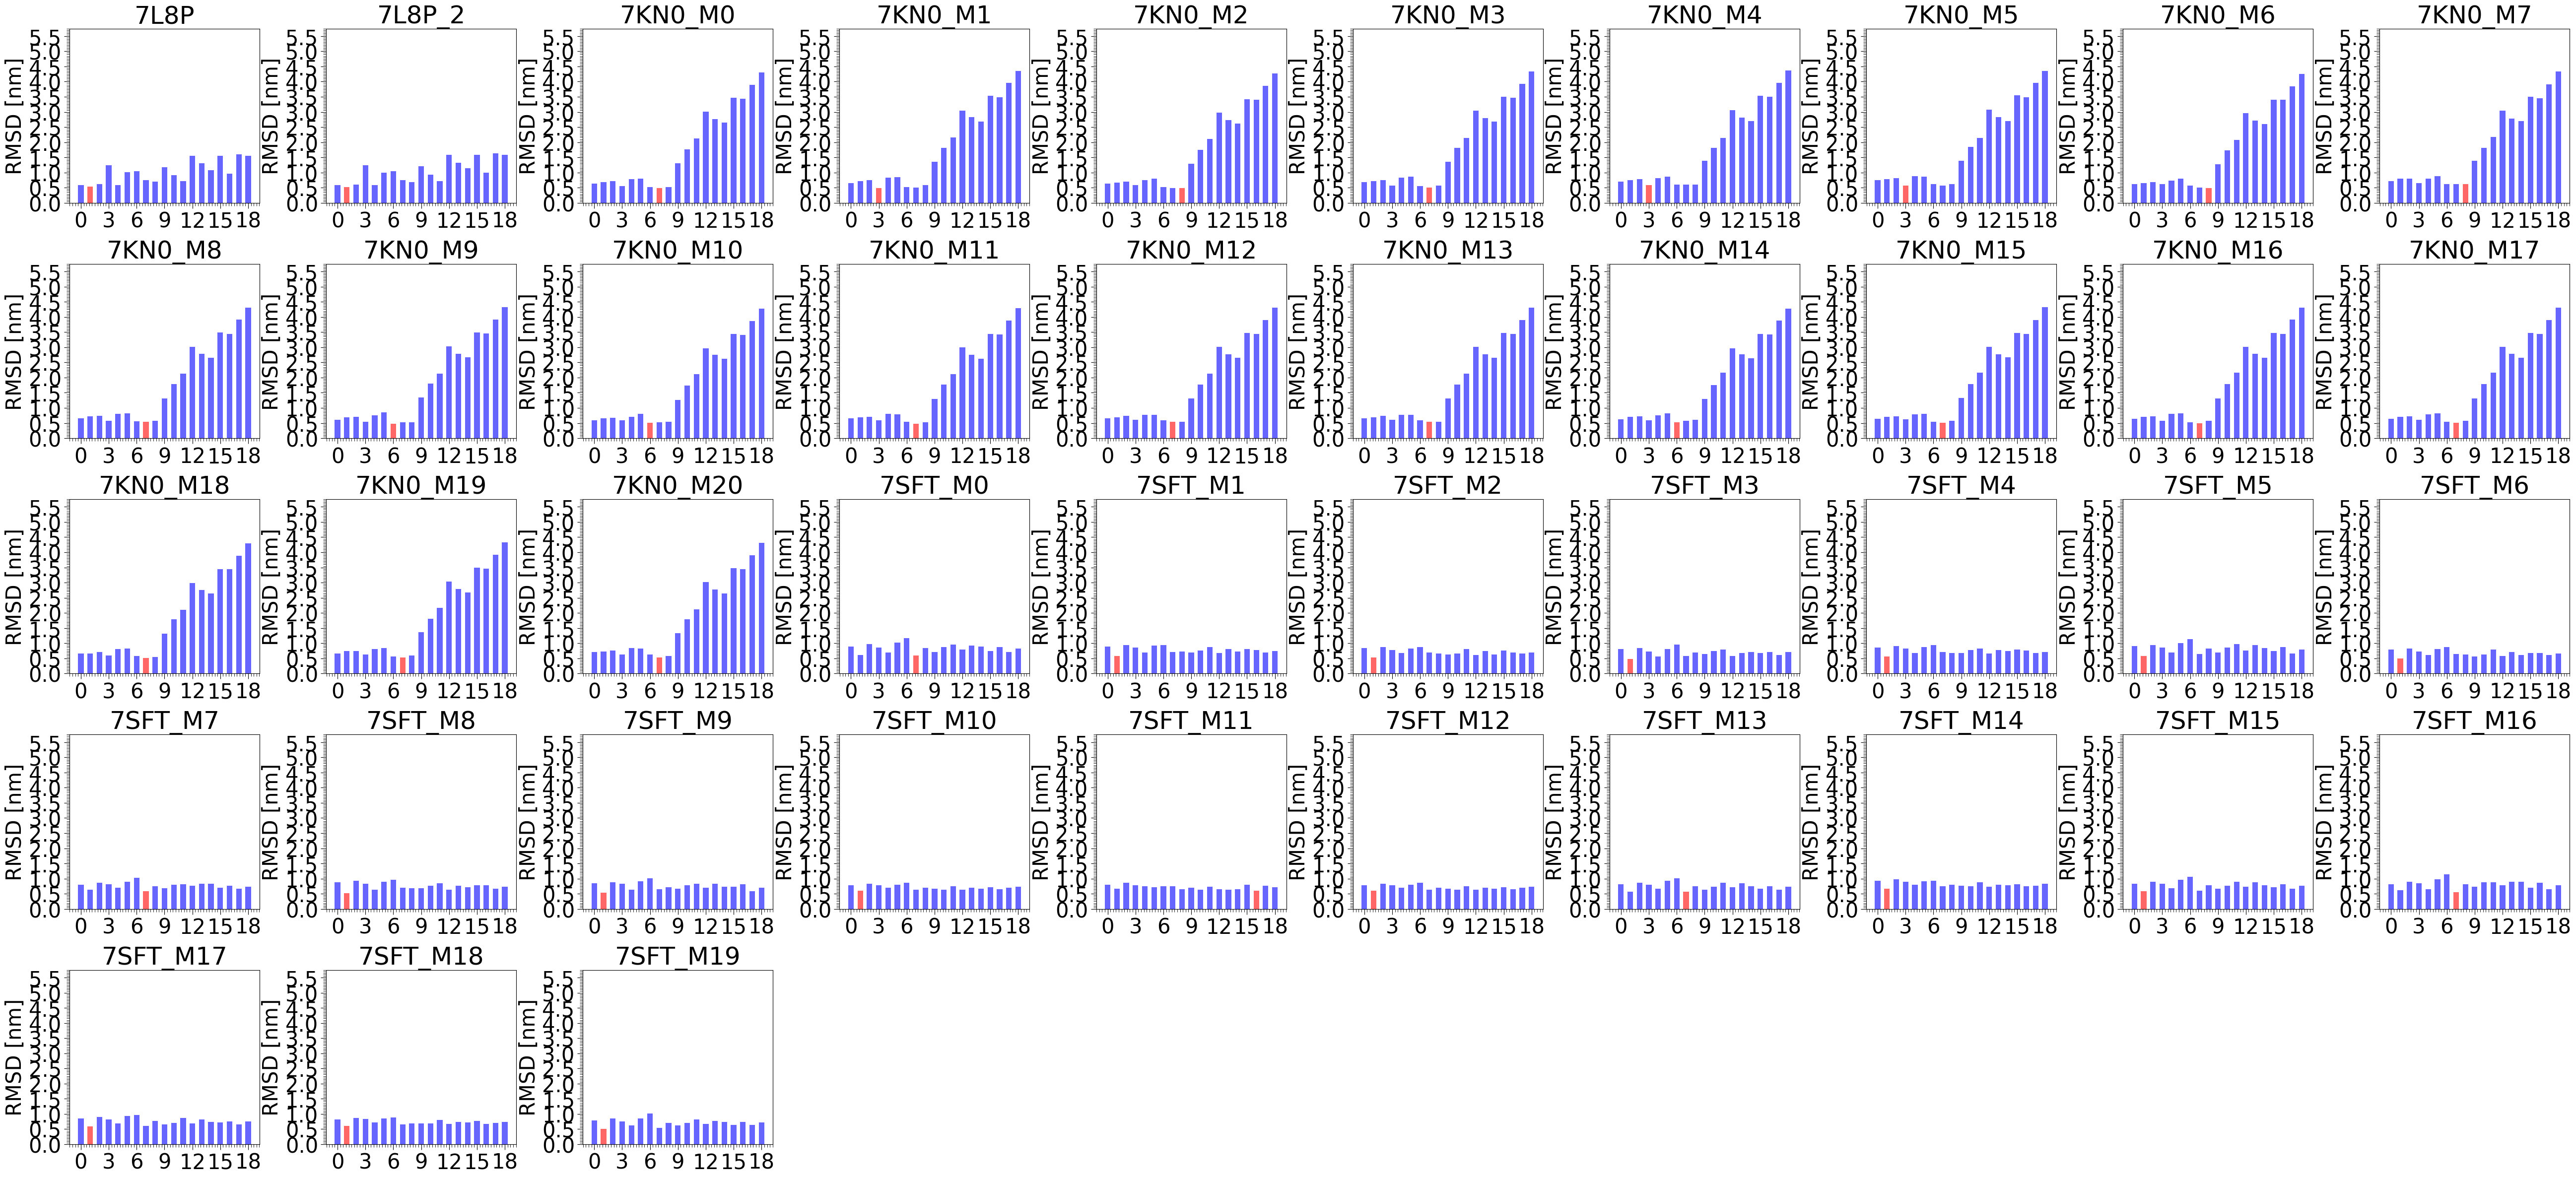

In [35]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

font = {'weight' : 'normal',
        'size'   : 30}

plt.rc('font', **font)

# Number of rows and columns for subplots based on the number of inner dictionaries
# num_dicts = len(rmsd_exp_string_image)
# rows = 5
# cols = (num_dicts + 1) // 5  # Adjust for total number of subplots

# Create figure and gridspec layout
fig = plt.figure(figsize=(65, 60))

targetNMR='7'

rows=10
cols=10

gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)

# # Iterate through the dictionary of dictionaries and plot each one
count_i=0
for i, (key, inner_dict) in enumerate(transposed_rmsd_exp_string_image.items()):
    
    check_nmr = False
    for n in nmr_structs:
        if n.startswith(targetNMR):
            if key.startswith(n):
                check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if n.startswith(targetNMR):
            if key.startswith(n):
                check_nmr = True
            
    if not check_nmr:
        continue

    ax = fig.add_subplot(gs[count_i])
    
#     # Get keys and values from the inner dictionary
    keys = list(inner_dict.keys())
    values = list(inner_dict.values())
    
# #     # Bar plot for the current dictionary
    

    #print(key,min_value_keys.get(key))
    colors = ['red' if k == min_value_keys.get(key) else 'blue' for k in keys]
    ax.bar(keys, values, color=colors, width=0.6, alpha=0.6)
    
#     plt.xticks(rotation=90, fontsize=12)
    
    ax.xaxis.set_major_locator(MultipleLocator(3))
    ax.yaxis.set_major_locator(MultipleLocator(0.5))
    ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))
    ax.tick_params(which='major', length=8)
    ax.tick_params(which='minor', length=4)
    
    ax.set_title(key.upper())
    
    ax.set_ylim(0,5.75)
    
#     # Set titles and labels for each subplot
#     ax.set_title(f"{key}")
#     ax.set_xlabel('Keys')
    ax.set_ylabel('RMSD [nm]')
    
    count_i+=1

# # Show the full grid of subplots
# plt.show()


## plot RMSD of only min structures

In [18]:

rmsd_exp_sim_min_pair = {}
for i, (key, inner_dict) in enumerate(transposed_rmsd_exp_string_image.items()):
    rmsd_exp_sim_min_pair[key] = {min_value_keys.get(key): inner_dict[min_value_keys.get(key)]}
    
    

In [28]:
# rmsd_exp_sim_min_pair

In [29]:
# len(list(np.arange(0,3*np.shape(x_labels)[0],3))), len(list(np.arange(0,2*np.shape(x_labels)[0],2)))

### PLOT all RMSDs

['1TYE', '1TYE_2', '1TYE_3', '2VC2', '2VDK', '2VDL', '2VDM', '2VDN', '2VDO', '2VDP', '2VDQ', '2VDR', '3FCS', '3FCS_2', '3FCU', '3FCU_2', '3FCU_3', '3NID', '3NID_2', '3NIF', '3NIF_2', '3NIG', '3NIG_2', '3T3M', '3T3M_2', '3T3P', '3T3P_2', '3ZDX', '3ZDX_2', '3ZDY', '3ZDY_2', '3ZDZ', '3ZE0', '3ZE1', '3ZE2', '3ZDZ_2', '3ZE0_2', '3ZE1_2', '3ZE2_2', '4Z7N', '4Z7N_2', '4Z7O', '4Z7O_2', '4Z7Q', '4Z7Q_2', '5HDB', '5HDB_2', '7TCT', '7TCT_2', '7TD8', '7TD8_2', '7THO', '7THO_2', '7TMZ', '7TMZ_2', '7TPD', '7TPD_2', '7U60', '7U60_2', '7U9F', '7U9F_2', '7U9V', '7U9V_2', '7UBR', '7UBR_2', '7UCY', '7UCY_2', '7UDG', '7UDG_2', '7UDH', '7UDH_2', '7UE0', '7UE0_2', '7UFH', '7UFH_2', '7UH8', '7UH8_2', '7UJE', '7UJE_2', '7UJK', '7UJK_2', '7UK9', '7UK9_2', '7UKO', '7UKO_2', '7UKP', '7UKP_2', '7UKT', '7UKT_2'] [0.603274318330358, 0.6187446267652367, 0.6106071356149532, 0.5784573483870733, 0.5776797106679765, 0.5785405207677721, 0.5729470427967025, 0.5786566893897731, 0.5752182781775308, 0.5709627030446892, 0.574

Text(0, 0.5, 'RMSD [nm]')

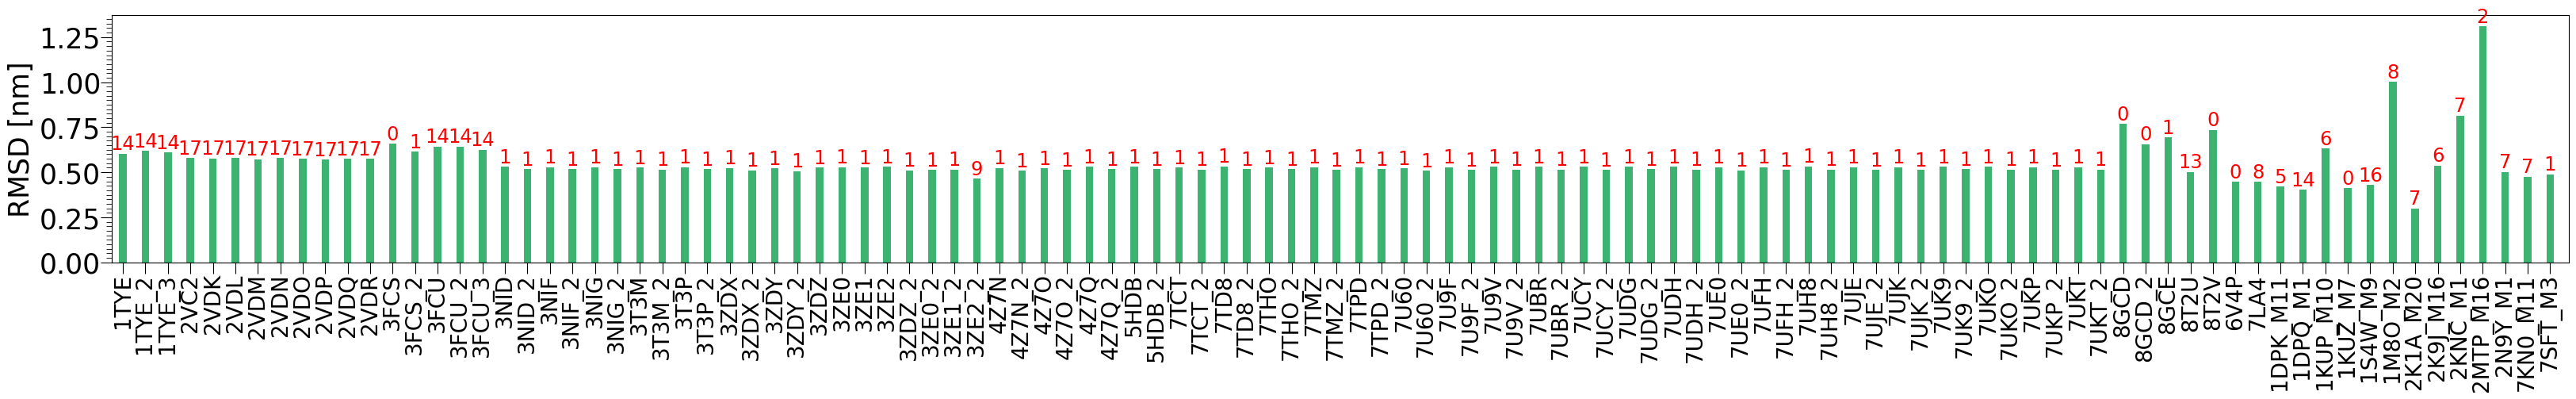

In [21]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

font = {'weight' : 'normal',
        'size'   : 25}

plt.rc('font', **font)

# fig = plt.figure(figsize=(5, 60))
fig = plt.figure(figsize=(40, 15))



rows=3
cols=1


gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)


x_labels = []
y_values = []
image_labels = []


# Crystal
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    

    check_cryo = False
    for cr in cryo_structs:
        if outer_key.startswith(cr):
            check_cryo = True

    if check_cryo:
        continue
        
    if key.startswith('4cak'):
        continue
        
        
    check_nmr = False
    for n in nmr_structs:
        if outer_key.startswith(n):
            check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if outer_key.startswith(n):
            check_nmr = True
            
    if check_nmr:
        continue
        


    for inner_key, value in inner_dict.items():
        
        image_labels.append(f'{inner_key}')
        #x_labels.append(f'{outer_key.upper()}:{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        
        y_values.append(value)
        
    
print(x_labels, y_values)
        
   
# Cryo
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
    check_cryst = False
    for c in cryst_structs:
        if outer_key.startswith(c):
            check_cryst = True

    if check_cryst:
        continue
        
        
    check_nmr = False
    for n in nmr_structs:
        if outer_key.startswith(n):
            check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if outer_key.startswith(n):
            check_nmr = True
            
    if check_nmr:
        continue
        
        
    if outer_key.startswith('4cak'):
        continue
        


    for inner_key, value in inner_dict.items():
        
        image_labels.append(f'{inner_key}')
        #x_labels.append(f'{outer_key.upper()}:{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        
        y_values.append(value)
        
        
# NMR
min_values = {}
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
    
    check_cryst = False
    for c in cryst_structs:
        if outer_key.startswith(c):
            check_cryst = True

    if check_cryst:
        continue
        
    
    check_cryo = False
    for cr in cryo_structs:
        if outer_key.startswith(cr):
            check_cryo = True

    if check_cryo:
        continue
        
    if outer_key.startswith('4cak'):
        continue
        

    rmsd_value = list(inner_dict.values())[0]
    inner_key = list(inner_dict.keys())[0]

    
    for n in nmr_structs:
        if outer_key.startswith(n):
            
            if n not in min_values or rmsd_value < min_values[n][2]:
                min_values[n] = (outer_key, inner_key, rmsd_value)
        
        
        
    
rmsd_exp_sim_min_nmr_pair = {key: {inner_key: value} for key, inner_key, value in min_values.values()}

for outer_key, inner_dict in rmsd_exp_sim_min_nmr_pair.items():

    for inner_key, value in inner_dict.items():
                
        image_labels.append(f'{inner_key}')
        #x_labels.append(f'{outer_key.upper()}:{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        
        y_values.append(value)       
        
        
        
        
        
        
     
ax = fig.add_subplot(gs[0,0])
# ticks=list(np.arange(0,2*np.shape(x_labels)[0],2))
ticks=list(np.arange(0,6*np.shape(x_labels)[0],6))

# bar = ax.bar(ticks, y_values,width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')

# bar = ax.barh(ticks,y_values,color='mediumseagreen')#, width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')
# ax.set_yticks(ticks=ticks)#list(np.arange(np.shape(x_labels)[0])))
# ax.set_yticklabels(labels=x_labels, rotation=0, ha='right', fontsize=10)
# for i, rect in enumerate(bar):
#     ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2.0, f'{image_labels[i]}', 
#              ha='left', rotation=0, va='center', fontsize=10)




# # ax.set_ylabel('RMSD [nm]')
# ax.set_ylim(-3,6*np.shape(x_labels)[0]-1)
# # ax.set_ylim(0,1.3)

# ax.yaxis.set_major_locator(MultipleLocator(6))
# ax.xaxis.set_major_locator(MultipleLocator(0.25))
# # ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# ax.tick_params(axis='y', which='major', length=6, pad=0)
# # # ax.tick_params(which='minor', length=8)

# ax.set_xlabel('RMSD [nm]')    



bar = ax.bar(ticks,y_values,color='mediumseagreen',width=2)#, width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')
ax.set_xticks(ticks=ticks)#list(np.arange(np.shape(x_labels)[0])))
ax.set_xticklabels(labels=x_labels, rotation=90, ha='center', fontsize=20)
for i, rect in enumerate(bar):
    ax.text(rect.get_x() + rect.get_width() / 2.0,  rect.get_height(), f'{image_labels[i]}', 
             ha='center', rotation=0, va='bottom', color='red', fontsize=17.5)    



#ax.set_ylim(-3,6*np.shape(x_labels)[0]-1)

ax.set_xlim(-3,6*np.shape(x_labels)[0]-1)


# ax.yaxis.set_major_locator(MultipleLocator(6))
# ax.xaxis.set_major_locator(MultipleLocator(0.25))
# # ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# ax.tick_params(axis='y', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='minor', length=5, pad=0)


ax.xaxis.set_major_locator(MultipleLocator(6))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
# ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))

ax.tick_params(axis='x', which='major', length=10, pad=0)
ax.tick_params(axis='y', which='major', length=10, pad=0)
ax.tick_params(axis='y', which='minor', length=5, pad=0)



# ax.set_xlabel('RMSD [nm]')

ax.set_ylabel('RMSD [nm]')

# ax.set_ylabel('Experimental structure')

    


In [22]:
# rmsd_exp_sim_min_pair

## PLOT ONLY 1 STRUCT PER PDB

nmr cryo like names
{'7l8p': ('7l8p_2', 1, 0.5130892114474878), '7l8p_2': ('7l8p_2', 1, 0.5130892114474878)}
nmr
{'1dpk': ('1dpk_m11', 5, 0.42084211169457475), '1dpq': ('1dpq_m1', 14, 0.4040196855311079), '1kup': ('1kup_m10', 6, 0.6314456061590566), '1kuz': ('1kuz_m7', 0, 0.4112038600694997), '1s4w': ('1s4w_m9', 16, 0.42872650740319945), '1m8o': ('1m8o_m2', 8, 1.0022665421989203), '2k1a': ('2k1a_m20', 7, 0.2999797091797497), '2k9j': ('2k9j_m16', 6, 0.5373393473880614), '2knc': ('2knc_m1', 7, 0.8153783628457625), '2mtp': ('2mtp_m16', 2, 1.3089027112622433), '2n9y': ('2n9y_m1', 7, 0.5010737331903407), '7kn0': ('7kn0_m11', 7, 0.47597006597434754), '7sft': ('7sft_m3', 1, 0.4894919944646112)}
min RMSD:2K1A_M20,max RMSD:2MTP_M16
min RMSD:0.2999797091797497,max RMSD:1.3089027112622433


Text(0, 0.5, 'RMSD [nm]')

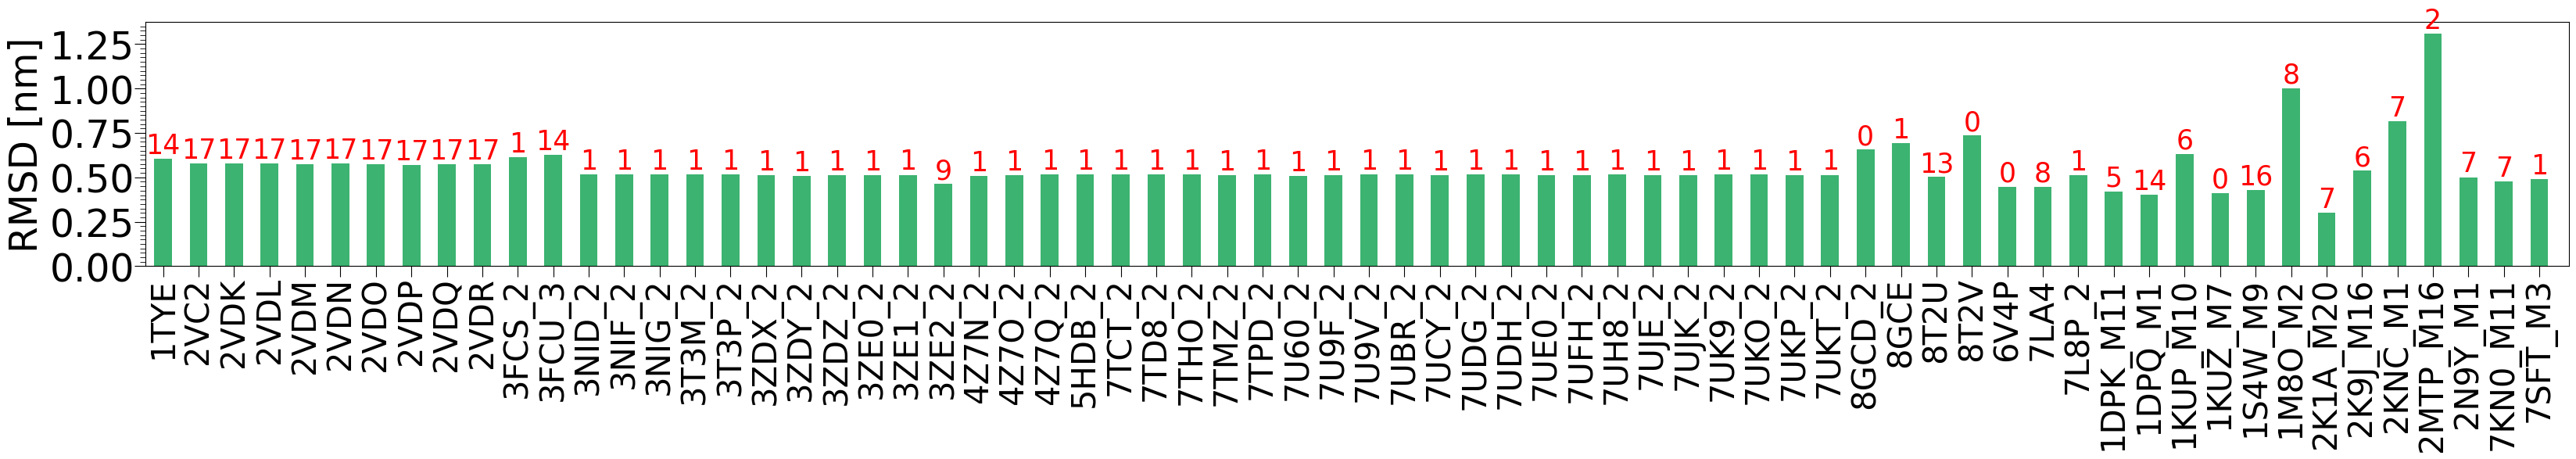

In [21]:
import matplotlib.gridspec as gridspec
from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

font = {'weight' : 'normal',
        'size'   : 35}

plt.rc('font', **font)

# fig = plt.figure(figsize=(5, 60))
fig = plt.figure(figsize=(40, 15))



rows=3
cols=1


gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)



x_labels = []
y_values = []
image_labels = []

# EXP 
# NMR
exp_min_values = {}
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
    
    
    check_cryo = False
    for cr in cryo_structs:
        if outer_key.startswith(cr):
            check_cryo = True

    if check_cryo:
        continue
        
    if outer_key.startswith('4cak'):
        continue
        
    check_nmr = False
    for n in nmr_structs:
        if outer_key.startswith(n):
            check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if outer_key.startswith(n):
            check_nmr = True
            
    if check_nmr:
        continue
        
        
    
#     check_exp = False
#     for e in exp_structs:
#         if outer_key.startswith(e):
#             check_exp = True

#     if not check_exp:
#         continue   
        
#     if outer_key.startswith('4cak'):
#         continue

        
        
        
    rmsd_value = list(inner_dict.values())[0]
    inner_key = list(inner_dict.keys())[0]

    
    for e in cryst_structs:
        if outer_key.startswith(e.split('_')[0]):
            
            if e not in exp_min_values or rmsd_value < exp_min_values[e][2]:
                exp_min_values[e] = (outer_key, inner_key, rmsd_value)
                
    
rmsd_exp_sim_min_exp_pair = {key: {inner_key: value} for key, inner_key, value in exp_min_values.values()}

for outer_key, inner_dict in rmsd_exp_sim_min_exp_pair.items():

    for inner_key, value in inner_dict.items():
                
        image_labels.append(f'{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        y_values.append(value)  
        
        
#print(x_labels, y_values)
                

# Cryo
exp_cryo_values = {}
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    

    
    check_cryst = False
    for c in cryst_structs:
        if outer_key.startswith(c):
            check_cryst = True

    if check_cryst:
        continue
        
        
    check_nmr = False
    for n in nmr_structs:
        if outer_key.startswith(n):
            check_nmr = True
                
    for n in nmr_structs_cryo_likenames:
        if outer_key.startswith(n):
            check_nmr = True
            
    if check_nmr:
        continue
        
        
    if outer_key.startswith('4cak'):
        continue
        
        
    rmsd_value = list(inner_dict.values())[0]
    inner_key = list(inner_dict.keys())[0]

    
    for e in cryo_structs:
        if outer_key.startswith(e.split('_')[0]):
            
            if e not in exp_cryo_values or rmsd_value < exp_cryo_values[e][2]:
                exp_cryo_values[e] = (outer_key, inner_key, rmsd_value)
                
                

rmsd_exp_sim_min_exp_pair = {key: {inner_key: value} for key, inner_key, value in exp_cryo_values.values()}

for outer_key, inner_dict in rmsd_exp_sim_min_exp_pair.items():

    for inner_key, value in inner_dict.items():
                
        image_labels.append(f'{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        y_values.append(value)  
        
        
# print(x_labels, y_values)

print('nmr cryo like names')

# NMR CRYO LIKE NAMES
nmrcryo_min_values = {}
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
    check_nmr = False                
    for n in nmr_structs_cryo_likenames:
        if outer_key.startswith(n):
            check_nmr = True
            
    if not check_nmr:
        continue

        
    rmsd_value = list(inner_dict.values())[0]
    inner_key = list(inner_dict.keys())[0]

    
    for e in nmr_structs_cryo_likenames:
        if outer_key.startswith(e.split('_')[0]):
            
            if e not in nmrcryo_min_values or rmsd_value < nmrcryo_min_values[e][2]:
                nmrcryo_min_values[e] = (outer_key, inner_key, rmsd_value)
                
                
                
rmsd_exp_sim_min_exp_pair = {key: {inner_key: value} for key, inner_key, value in nmrcryo_min_values.values()}

for outer_key, inner_dict in rmsd_exp_sim_min_exp_pair.items():

    for inner_key, value in inner_dict.items():
                
        image_labels.append(f'{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        y_values.append(value)  
        
        
print(nmrcryo_min_values)

        
print('nmr')
        
# NMR
nmr_min_values = {}
for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
    check_nmr = False
    for n in nmr_structs:
        if outer_key.startswith(n):
            check_nmr = True
            
    if not check_nmr:
        continue
        
    #print(outer_key)

#     for n in nmr_structs:
#         if outer_key.startswith(n):
            
#             if n not in min_values or rmsd_value < nmr_min_values[n][2]:
#                 nmr_min_values[n] = (outer_key, inner_key, rmsd_value)
        
# print(x_labels, y_values)

        
    rmsd_value = list(inner_dict.values())[0]
    inner_key = list(inner_dict.keys())[0]

    
    for e in nmr_structs:
        if outer_key.startswith(e.split('_')[0]):
            
            if e not in nmr_min_values or rmsd_value < nmr_min_values[e][2]:
                nmr_min_values[e] = (outer_key, inner_key, rmsd_value)
                
                
                
rmsd_exp_sim_min_exp_pair = {key: {inner_key: value} for key, inner_key, value in nmr_min_values.values()}

for outer_key, inner_dict in rmsd_exp_sim_min_exp_pair.items():

    for inner_key, value in inner_dict.items():
                
        image_labels.append(f'{inner_key}')
        x_labels.append(f'{outer_key.upper()}')
        y_values.append(value)  
        
 
print(nmr_min_values)

#print(x_labels, y_values)
    
    
# rmsd_exp_sim_min_nmr_pair = {key: {inner_key: value} for key, inner_key, value in min_values.values()}

# for outer_key, inner_dict in rmsd_exp_sim_min_nmr_pair.items():

#     for inner_key, value in inner_dict.items():
                
#         image_labels.append(f'{inner_key}')
#         x_labels.append(f'{outer_key.upper()}')
#         y_values.append(value)       
        
        
print(f'min RMSD:{x_labels[np.argmin(y_values)]},max RMSD:{x_labels[np.argmax(y_values)]}')
print(f'min RMSD:{y_values[np.argmin(y_values)]},max RMSD:{y_values[np.argmax(y_values)]}')

        
        
ax = fig.add_subplot(gs[0,0])
# ticks=list(np.arange(0,2*np.shape(x_labels)[0],2))
ticks=list(np.arange(0,6*np.shape(x_labels)[0],6))

# bar = ax.bar(ticks, y_values,width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')

# bar = ax.barh(ticks,y_values,color='mediumseagreen',height=3)#, width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')
# ax.set_yticks(ticks=ticks)#list(np.arange(np.shape(x_labels)[0])))
# ax.set_yticklabels(labels=x_labels, rotation=0, ha='right', fontsize=16)
# for i, rect in enumerate(bar):
#     ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2.0, f'{image_labels[i]}', 
#              ha='left', rotation=0, va='center', fontsize=15)
    
    #ax.text(width, y + bar.get_height() / 2, f'{width}', ha='left', va='center')
    
bar = ax.bar(ticks,y_values,color='mediumseagreen',width=3)#, width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')
ax.set_xticks(ticks=ticks)#list(np.arange(np.shape(x_labels)[0])))
ax.set_xticklabels(labels=x_labels, rotation=90, ha='center', fontsize=30)
for i, rect in enumerate(bar):
    ax.text(rect.get_x() + rect.get_width() / 2.0,  rect.get_height(), f'{image_labels[i]}', 
             ha='center', rotation=0, va='bottom', fontsize=25, color='red')    



#ax.set_ylim(-3,6*np.shape(x_labels)[0]-1)

ax.set_xlim(-3,6*np.shape(x_labels)[0]-1)


# ax.yaxis.set_major_locator(MultipleLocator(6))
# ax.xaxis.set_major_locator(MultipleLocator(0.25))
# # ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# ax.tick_params(axis='y', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='minor', length=5, pad=0)


ax.xaxis.set_major_locator(MultipleLocator(6))
ax.yaxis.set_major_locator(MultipleLocator(0.25))
# ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
ax.yaxis.set_minor_locator(AutoMinorLocator(n=10))

ax.tick_params(axis='x', which='major', length=10, pad=0)
ax.tick_params(axis='y', which='major', length=10, pad=0)
ax.tick_params(axis='y', which='minor', length=5, pad=0)



# ax.set_xlabel('RMSD [nm]')

ax.set_ylabel('RMSD [nm]')

# ax.set_ylabel('Experimental structure')


## PLOT AVERAGE RMSD

In [31]:
for key in rmsd_exp_sim_min_pair:
    if key.startswith('3fcs'):
        print(key, rmsd_exp_sim_min_pair[key])

# print(0.6429845198318069 + 0.6424814592595088 + 0.6250364285945652)
# (0.6429845198318069+0.6429845198318069+0.6250364285945652)#/3.0

3fcs_2 {1: 0.6140109781945698}
3fcs {0: 0.6583834685394889}


In [27]:
# exp_min_values = {}
# count_e_repeats = {}
# for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
#     check_exp = False
#     for e in exp_structs:
#         if outer_key.startswith(e):
#             check_exp = True

#     if not check_exp:
#         continue   
        
#     if outer_key.startswith('4cak'):
#         continue

#     rmsd_value = list(inner_dict.values())[0]
#     inner_key = list(inner_dict.keys())[0]
    
    
#     if outer_key.split('_')[0] not in exp_min_values:
#         exp_min_values[outer_key.split('_')[0]] = [outer_key, inner_key, []]
#         exp_min_values[outer_key.split('_')[0]][2].append(rmsd_value)
#     else:
#         exp_min_values[outer_key.split('_')[0]][2].append(rmsd_value)
    
# print(exp_min_values['3fcu'])

# for e in exp_min_values:
#     exp_min_values[e][2] =  [np.mean(exp_min_values[e][2])]
            
# exp_min_values['3fcu']

In [23]:
# import matplotlib.gridspec as gridspec
# from matplotlib.ticker import MaxNLocator, MultipleLocator, AutoMinorLocator

# font = {'weight' : 'normal',
#         'size'   : 12}

# plt.rc('font', **font)

# fig = plt.figure(figsize=(5, 60))


# rows=3
# cols=1


# gs = gridspec.GridSpec(rows, cols, hspace=0.35, wspace=0.35)



# x_labels = []
# y_values = []
# image_labels = []

# # EXP 
# # NMR
# exp_min_values = {}
# for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
#     check_exp = False
#     for e in exp_structs:
#         if outer_key.startswith(e):
#             check_exp = True

#     if not check_exp:
#         continue   
        
#     if outer_key.startswith('4cak'):
#         continue

#     rmsd_value = list(inner_dict.values())[0]
#     inner_key = list(inner_dict.keys())[0]

    
#     for e in exp_structs:
#         if outer_key.startswith(e.split('_')[0]):
            
#             if e not in min_values or rmsd_value < exp_min_values[e][2]:
#                 exp_min_values[e] = (outer_key, inner_key, rmsd_value)
                
    
# rmsd_exp_sim_min_exp_pair = {key: {inner_key: value} for key, inner_key, value in exp_min_values.values()}

# for outer_key, inner_dict in rmsd_exp_sim_min_exp_pair.items():

#     for inner_key, value in inner_dict.items():
                
#         image_labels.append(f'{inner_key}')
#         x_labels.append(f'{outer_key.upper()}')
#         y_values.append(value)  
        
        
# # print(x_labels, y_values)
                

# # STATE
# for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    

#     if not outer_key.startswith('state'):
#         continue

#     for inner_key, value in inner_dict.items():
        
#         image_labels.append(f'{inner_key}')
#         x_labels.append(f'{outer_key.upper()}')
#         y_values.append(value)
        
        
# # NMR
# min_values = {}
# for outer_key, inner_dict in rmsd_exp_sim_min_pair.items():
    
#     check_nmr = False
#     for n in nmr_structs:
#         if outer_key.startswith(n):
#             check_nmr = True

#     if not check_nmr:
#         continue   

#     rmsd_value = list(inner_dict.values())[0]
#     inner_key = list(inner_dict.keys())[0]

    
#     for n in nmr_structs:
#         if outer_key.startswith(n):
            
#             if n not in min_values or rmsd_value < min_values[n][2]:
#                 min_values[n] = (outer_key, inner_key, rmsd_value)
        
    
# rmsd_exp_sim_min_nmr_pair = {key: {inner_key: value} for key, inner_key, value in min_values.values()}

# for outer_key, inner_dict in rmsd_exp_sim_min_nmr_pair.items():

#     for inner_key, value in inner_dict.items():
                
#         image_labels.append(f'{inner_key}')
#         x_labels.append(f'{outer_key.upper()}')
#         y_values.append(value)       
        
        
# print(f'min RMSD:{x_labels[np.argmin(y_values)]},max RMSD:{x_labels[np.argmax(y_values)]}')
# print(f'min RMSD:{y_values[np.argmin(y_values)]},max RMSD:{y_values[np.argmax(y_values)]}')

        
        
# ax = fig.add_subplot(gs[0,0])
# # ticks=list(np.arange(0,2*np.shape(x_labels)[0],2))
# ticks=list(np.arange(0,6*np.shape(x_labels)[0],6))

# # bar = ax.bar(ticks, y_values,width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')

# bar = ax.barh(ticks,y_values,color='mediumseagreen',height=2)#, width=2,color='mediumseagreen')#,s=100,color='mediumseagreen') # width=0.6, alpha=0.6,color='mediumseagreen')
# ax.set_yticks(ticks=ticks)#list(np.arange(np.shape(x_labels)[0])))
# ax.set_yticklabels(labels=x_labels, rotation=0, ha='right', fontsize=12)

# for i, rect in enumerate(bar):
#     ax.text(rect.get_width(), rect.get_y() + rect.get_height() / 2.0, f'{image_labels[i]}', 
#              ha='left', rotation=0, va='center', fontsize=12)
    
#     #ax.text(width, y + bar.get_height() / 2, f'{width}', ha='left', va='center')


# # for bar, disease in zip(ax.patches, Disease[::-1]):
# #     ax.text(0.1, bar.get_y()+bar.get_height()/2, disease, color = 'white', ha = 'left', va = 'center')

# # ax.set_ylabel('RMSD [nm]')
# ax.set_ylim(-3,6*np.shape(x_labels)[0]-1)
# # ax.set_ylim(0,1.3)

# ax.yaxis.set_major_locator(MultipleLocator(6))
# ax.xaxis.set_major_locator(MultipleLocator(0.25))
# # ax.yaxis.set_minor_locator(AutoMinorLocator(n=0))
# ax.xaxis.set_minor_locator(AutoMinorLocator(n=10))

# ax.tick_params(axis='y', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='major', length=10, pad=0)
# ax.tick_params(axis='x', which='minor', length=5, pad=0)

# # # ax.tick_params(which='minor', length=8)

# ax.set_xlabel('RMSD [nm]')
# # ax.set_ylabel('Experimental structure')


## visualize

In [113]:
view = nv.show_mdanalysis(exp_string_universe)

view

NGLWidget(max_frame=1)

In [47]:
view = nv.show_mdanalysis(exp_string_universe)

view

NGLWidget(max_frame=1)

In [25]:

# exp_universe_image_dict = {}
# string_universe_image_dict = {}


# for images in range(19):
    
#     exp_universe_image_dict_e = {}
#     state_universe_image_dict_e = {}
#     nmr_universe_image_dict_e = {}
    
#     exp_string_universe_image_dict_e = {}
#     state_string_universe_image_dict_e = {}
#     nmr_string_universe_image_dict_e = {}
    
    
#     for e in exp_structs:

#         exp_struct = path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/'+e+'_aligned_CA_frame_'+str(0)+'.pdb'
#         string_struct = path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+e+'_CA_frame_'+str(0)+'.pdb'
       
#         exp_universe = mda.Universe(exp_struct)
#         string_universe = mda.Universe(string_struct) 
        
#         exp_universe_image_dict_e[e] = exp_universe
#         exp_string_universe_image_dict_e[e] = string_universe
        
#         #exp_string_universe = mda.Universe(exp_struct,exp_struct,string_struct)
        
#     for s in state_structs:

#         state_struct = path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/'+s+'_aligned_CA_frame_'+str(0)+'.pdb'
#         string_struct = path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+s+'_CA_frame_'+str(0)+'.pdb'
       
        
#         state_universe = mda.Universe(state_struct)
#         string_universe = mda.Universe(string_struct) 
        
#         state_universe_image_dict_e[s] = state_universe
#         state_string_universe_image_dict_e[s] = string_universe
        
#     for n in nmr_structs:

#         nmr_files = glob.glob(path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/'+n+'_aligned_CA_frame_*.pdb')
#         string_files = glob.glob(path_to_structures+'/PDBstructures/target_md_'+str(images)+'_alignedStructures'+'/target_md_'+str(images)+'_'+n+'_CA_frame_*.pdb')
        
#         sorted_nmr_files = sorted(nmr_files, key=extract_frame_number)
#         sorted_string_files = sorted(string_files, key=extract_frame_number)
        
        
#         nmr_struct = {}
#         for f, frame_file in enumerate(sorted_nmr_files):
#             #print(frame_file)
#             #nmr_struct[f] = mda.Universe(frame_file)
            
#             nmr_universe_image_dict_e[n + '_f' + str(f)] = mda.Universe(frame_file)
            
#         string_struct = {}
#         for f, frame_file in enumerate(sorted_string_files):
            
#             print(images, f)
            
#             #string_struct[f] = mda.Universe(frame_file)
#             nmr_string_universe_image_dict_e[n + '_f' + str(f)] = mda.Universe(frame_file)
        
#         #nmr_universe = {**nmr_struct}
#         #string_universe = {**string_struct}
        
#         #nmr_universe_image_dict_e[n] = nmr_universe
#         #nmr_string_universe_image_dict_e[n] = string_universe
        
#         #print(nmr_universe_image_dict_e)
#         #break
        
#     exp_universe_image_dict[images] = {**exp_universe_image_dict_e, **state_universe_image_dict_e, **nmr_universe_image_dict_e}
#     string_universe_image_dict[images] = {**exp_string_universe_image_dict_e, **state_string_universe_image_dict_e, **nmr_string_universe_image_dict_e}
    